In [1]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#     tf.config.experimental.set_memory_growth(gpus[0], True)
#   except RuntimeError as e:
#     # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
#     print(e)

In [2]:
import tensorflow as tf

In [3]:
# tf.debugging.set_log_device_placement(True)

# # 텐서 생성
# a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
# b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
# c = tf.matmul(a, b)

# print(c)

In [4]:
# tf.debugging.set_log_device_placement(True)

# # 텐서를 CPU에 할당
# with tf.device('/CPU:0'):
#   a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
#   b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# c = tf.matmul(a, b)
# print(c)

In [5]:
# from tensorflow.python.client import device_lib

# device_lib.list_local_devices()

In [6]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"]='1'

### 라이브러리 선언

일반 CPU 활용 시

In [7]:
# # 라이브러리 정의 
# from tensorflow import keras
# from tensorflow.keras import layers
# import numpy as np
# import pandas as pd

cuda nvidia gpu 활용 시

In [8]:
# How to check if the code is running on GPU or CPU?

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

# import os
# os.environ["CUDA_VISIBLE_DEVICES"]='0'

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5343335186196956681
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1426250139
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5451066208292780393
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"
xla_global_id: 416903419
]


intel gpu 활용 시

In [9]:
# import numpy as np
# import os

# # intel gpu 적용
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
# import keras
# # mnist 데이터셋 
# from keras.datasets import mnist


In [10]:
import numpy as np
import mnist
from tensorflow import keras

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [11]:
import warnings

In [12]:
warnings.filterwarnings(action="ignore")

In [13]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


# 1. 타입 통합 / 특성 숫자컬럼 추가

### skip

# 2. 데이터 분리

In [14]:
import numpy as np
import mnist

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [15]:
import pandas as pd

In [16]:
one_char = pd.DataFrame(train_images[1])

In [17]:
one_char

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,159,50,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,252,237,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,233,252,57,6,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,84,252,253,122,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,96,189,253,167,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,47,79,255,168,0,0,0,0,0,0


In [18]:
one_char.to_csv("d:/letter_random.csv")

In [19]:
import cv2

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# cv2.imshow("test",train_images[1])

# cv2.waitKey(0)

# cv2.destroyAllWindows()

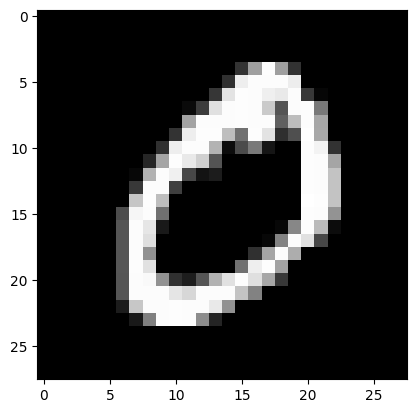

In [22]:
plt.imshow(train_images[1],cmap="gray")

In [23]:
# 이미지 정규화
train_images = (train_images / 255)
test_images = (test_images / 255)

# 이미지 형태 변경 (향후 CNN 시 차원 DEPTH 추가 필요)
train_images = train_images.reshape((len(train_images),28,28))
test_images = test_images.reshape((len(test_images),28,28))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 28, 28)
(10000, 28, 28)


In [24]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[2])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[2])

Original label 0 :  4
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# 3. 모델 생성

In [25]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

### 입출력 형태 정의
input_shape = train_images[0].shape
nclasses = len(np.unique(train_labels))

model = Sequential()
#input Layer
model.add(Flatten(input_shape=input_shape))
#Hidden Layer-1
model.add(Dense(units=8, activation='relu'))
#Hidden Layer-2
model.add(Dense(units=8, activation='relu'))
#Output layer
model.add(Dense(units=nclasses,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 모델 시각화
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=True)
# from IPython.display import Image
# Image(retina=True, filename='model_plot.png')


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# 4. 모델 컴파일

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 5. 모델 훈련

In [28]:
import os
from datetime import datetime

from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

datetime.now().strftime("%Y%m%d_%H%M%S")

logdir = os.path.join("logs_c", datetime.now().strftime("%Y%m%d_%H%M%S"))
logdir

callbacks = [
    
    TensorBoard(
    log_dir = logdir),
    
    EarlyStopping(monitor="val_loss", patience=10),
    
    ModelCheckpoint(filepath="model_mnist_weights.h5", 
                    monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
]

In [29]:
# 텐서를 CPU에 할당
with tf.device('/GPU:0'):
    history = model.fit(train_images,
                         train_labels_one_hot,
                         epochs=10,
                         batch_size=32,
                         callbacks=callbacks,
                         validation_split=0.2)

Epoch 1/10
1495/1500 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.7847
Epoch 1: val_accuracy improved from -inf to 0.88225, saving model to model_mnist_weights.h5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.6901 - accuracy: 0.7849 - val_loss: 0.3884 - val_accuracy: 0.8823
Epoch 2/10
1500/1500 [==============================] - ETA: 0s - loss: 0.3670 - accuracy: 0.8898
Epoch 2: val_accuracy improved from 0.88225 to 0.90575, saving model to model_mnist_weights.h5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3670 - accuracy: 0.8898 - val_loss: 0.3137 - val_accuracy: 0.9057
Epoch 3/10
1498/1500 [============================>.] - ETA: 0s - loss: 0.3178 - accuracy: 0.9060
Epoch 3: val_accuracy improved from 0.90575 to 0.91692, saving model to model_mnist_weights.h5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.3177 - accuracy: 0.9060 - val_loss: 0.2878 - val_accuracy: 0.9169
Epoch 4/10
1496/1500 [

# 6. 모델 추론

In [30]:
model.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 3s 8ms/step - loss: 0.2579 - accuracy: 0.9226


[0.25792545080184937, 0.9225999712944031]

### [실습]
Img_5.jpg 파일을 불러와서 예측하세요
testimg = cv2.imread(“./img_5.jpg”, cv2.IMREAD_GRAYSCALE)
testimg = testimg.reshape(1,28,28)

In [31]:
test_images.shape

(10000, 28, 28)

In [32]:
import cv2

In [33]:
testImg = cv2.imread("./img_5.jpg", cv2.IMREAD_GRAYSCALE)

In [34]:
testImg2 = testImg.astype(float)

testImg2 = testImg2/255.0

testImg2 = testImg2.reshape(1,28,28)

answer = model.predict(testImg2)

1/1 [==============================] - 0s 161ms/step


In [35]:
np.argmax(answer)

3

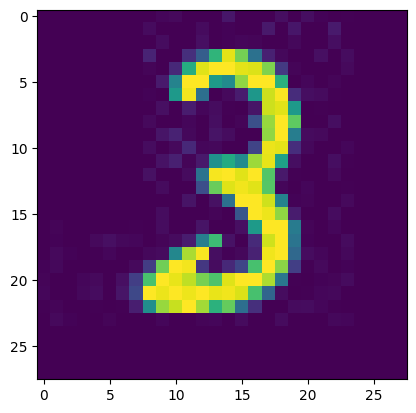

In [36]:
plt.imshow(testImg)

# GPU 메모리 해제

In [37]:
# from tensorflow.keras import backend as K

# K.clear_session()

# from numba import cuda
# cuda.select_device(0)
# cuda.close()